In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [57]:
# Plot dorsal ventral coordinates 

fN = h5py.File('../6819_3/6819_3_featuresN.hdf5')
traj = pd.read_hdf("../6819_3/6819_3_featuresN.hdf5", '/trajectories_data')

In [8]:
fN.keys()

<KeysViewHDF5 ['blob_features', 'coordinates', 'features_stats', 'fov_wells', 'fov_wells_backup', 'provenance_tracking', 'timeseries_data', 'trajectories_data']>

In [12]:
fN['coordinates'].keys()

<KeysViewHDF5 ['dorsal_contours', 'skeletons', 'ventral_contours', 'widths']>

In [13]:
len(fN['coordinates']['dorsal_contours'])

175024

In [63]:
dorsal = fN['coordinates']['dorsal_contours'][114151]  # Worm 26, in D7_mask_1
dorsal_x = [each[0]/12.4 for each in dorsal]
dorsal_y = [each[1]/12.4 for each in dorsal]

ventral = fN['coordinates']['ventral_contours'][114151]
ventral_x = [each[0]/12.4 for each in ventral]
ventral_y = [each[1]/12.4 for each in ventral]

In [60]:
len(dorsal_x)

49

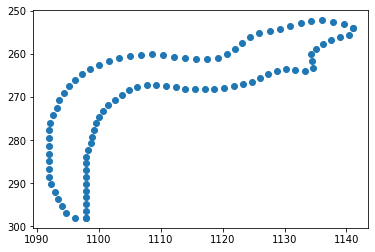

In [64]:
plt.scatter((dorsal_x, ventral_x), (dorsal_y, ventral_y))
plt.gca().invert_yaxis()

In [54]:
array = np.load("../6819_3/D7_mask_1.npy")
np.unique(array)

array([ 0, 26, 27, 36, 37, 38], dtype=int32)

In [ ]:
# worm index 26

In [62]:
traj[traj['worm_index_joined']==26]

,timestamp_raw,timestamp_time,worm_index_joined,coord_x,coord_y,threshold,roi_size,area,frame_number,was_skeletonized,skeleton_id,old_trajectory_data_index
120163,0,0.00,26,1111.546021,268.120911,107.800003,63.0,518.5,0,1,114151,120163
120164,1,0.04,26,1111.528931,268.174042,107.800003,63.0,518.5,1,1,114152,120164
120165,2,0.08,26,1111.504639,268.228577,107.800003,63.0,518.5,2,1,114153,120165
120166,3,0.12,26,1111.474121,268.284119,107.800003,63.0,518.5,3,1,114154,120166
120167,4,0.16,26,1111.437988,268.340210,107.800003,63.0,518.5,4,1,114155,120167
...,...,...,...,...,...,...,...,...,...,...,...,...
120238,75,3.00,26,1111.291992,268.536713,107.800003,63.0,522.0,75,1,114226,120238
120239,76,3.04,26,1111.270752,268.534424,107.800003,63.0,522.0,76,1,114227,120239
120240,77,3.08,26,1111.236572,268.539185,107.800003,63.0,522.0,77,1,114228,120240
120241,78,3.12,26,1111.188110,268.551849,107.800003,63.0,522.0,78,1,114229,120241


In [ ]:
# raw



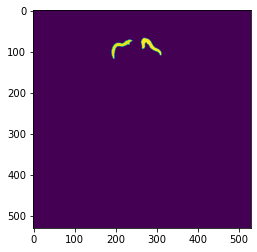

In [33]:
plt.imshow(array[0])

In [46]:
def plot(np_array):
    uniques_original = list(np.unique(np_array))[1:]  # [1:] to omit values == '0'
    print('unique_worm_ids: ', uniques_original)
    sequential_ids = range(1, len(uniques_original)+1)
    for i, original in enumerate(uniques_original):
        np_array[np_array == uniques_original[i]] = sequential_ids[i]  # Update stacked_array with sequential worm_ids
    print('sequential ids: ', list(np.unique(np_array))[1:])
    
    mpl.rcParams['image.interpolation'] = 'none'  # Prevent mpl smoothes the edges
    os.mkdir("pic_temporary")  # To temporarily store the files

    np_array[:, 0:2, 0:2] = 10
    np_array[:, 528:530, 528:530] = 1
    
    mask = np.where(np_array==0, -1, np_array)
    #print(np.unique(mask_1))

    value = -1
    masked_array = np.ma.masked_where(mask == value, mask)

    cmap = mpl.cm.get_cmap("tab20").copy()
            
    cmap.set_bad(color='black')

    plt.imshow(masked_array, cmap=cmap)

unique_worm_ids:  [26, 27]
sequential ids:  [1, 2]


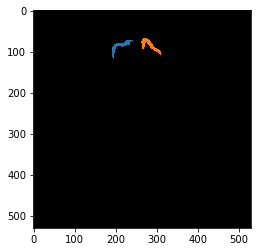

In [55]:
plot(array[0])

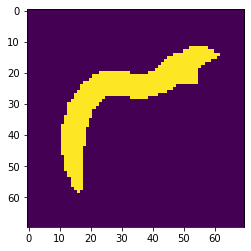

In [70]:
plt.imshow(array[0][60:130, 180:250])  # 70, 70 size

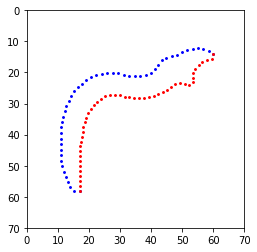

In [89]:
dorsal = fN['coordinates']['dorsal_contours'][114151]  # Worm 26, in D7_mask_1
dorsal_x = [each[0]/12.4-1081 for each in dorsal]
dorsal_y = [each[1]/12.4-250+10 for each in dorsal]

ventral = fN['coordinates']['ventral_contours'][114151]
ventral_x = [each[0]/12.4-1081 for each in ventral]
ventral_y = [each[1]/12.4-250+10 for each in ventral]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(dorsal_x, dorsal_y, color='blue', s=3.5)
plt.scatter(ventral_x, ventral_y, color='red', s=3.5)
plt.xlim(0,70)
plt.ylim(0,70)

ax.set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()

plt.show()

In [ ]:
# example
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x, y)
plt.xlim(-3,3)
plt.ylim(-3,3)

ax.set_aspect('equal', adjustable='box')

plt.xlabel("x")
plt.ylabel("sinx")

plt.show()